<h1><center>Prodigy InfoTech</center></h1>
<h2><center>TASK 3</center></h2>
<h3><center>Submitted by: Gokul Ram K</center></h3>
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [7]:
X.shape

(45211, 16)

In [8]:
y.shape

(45211, 1)

In [9]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [11]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [13]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [18]:
# Combining the labels and the data values

In [14]:
data = X

In [15]:
data['target'] = y

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
data.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64

In [19]:
# Droping missing value rows
data.drop(['education', 'job', 'contact', 'poutcome'], axis=1, inplace=True)

In [20]:
data.head()

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,target
0,58,married,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,single,no,29,yes,no,5,may,151,1,-1,0,no
2,33,married,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,married,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,single,no,1,no,no,5,may,198,1,-1,0,no


In [21]:
# Exploratory Data Analysis

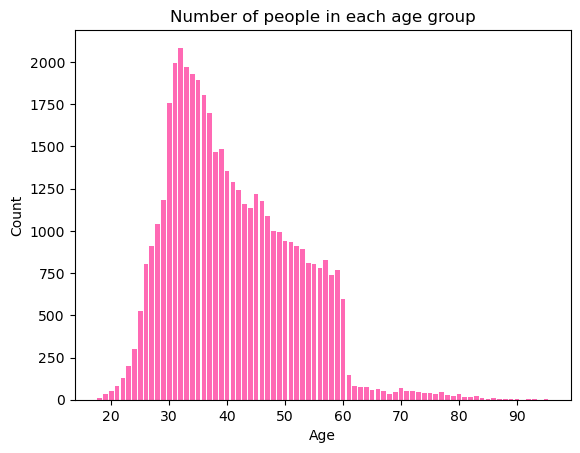

In [29]:
# Number of peolpe in each group

plt.bar(data['age'].value_counts().index, data['age'].value_counts().values, color='hotpink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of people in each age group')
plt.show()

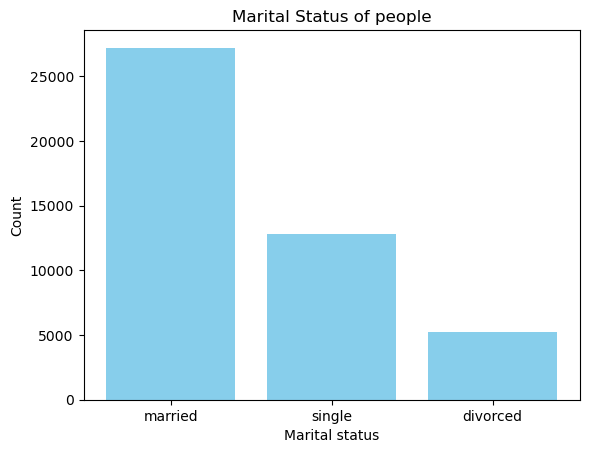

In [30]:
# Number of people married or unmarried

plt.bar(data['marital'].value_counts().index, data['marital'].value_counts().values, color='skyblue')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Marital Status of people')
plt.show()

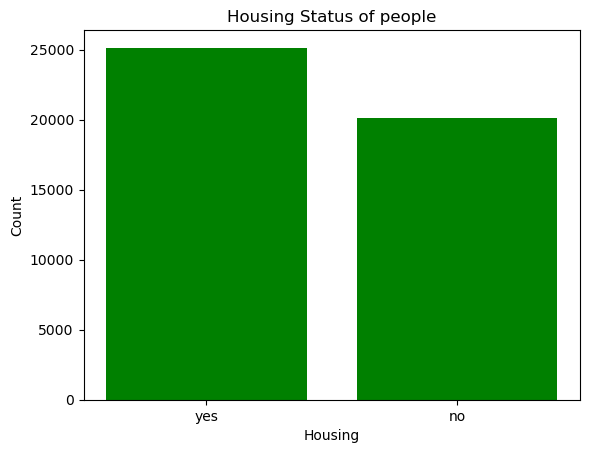

In [31]:
# Number of people with house

plt.bar(data['housing'].value_counts().index, data['housing'].value_counts().values, color='green')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Housing Status of people')
plt.show()

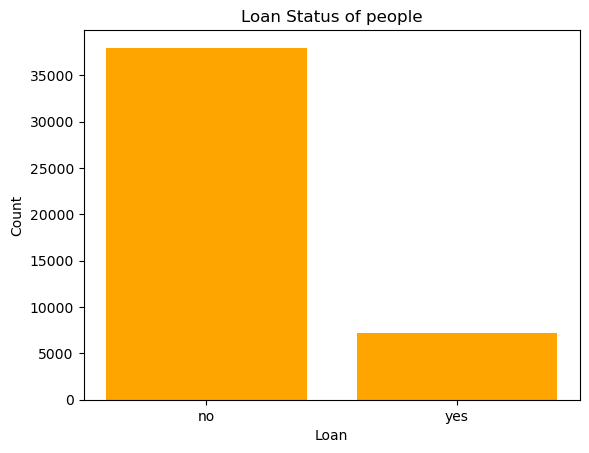

In [32]:
# Number of people with loan

plt.bar(data['loan'].value_counts().index, data['loan'].value_counts().values, color='orange')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.title('Loan Status of people')
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   marital      45211 non-null  object
 2   default      45211 non-null  object
 3   balance      45211 non-null  int64 
 4   housing      45211 non-null  object
 5   loan         45211 non-null  object
 6   day_of_week  45211 non-null  int64 
 7   month        45211 non-null  object
 8   duration     45211 non-null  int64 
 9   campaign     45211 non-null  int64 
 10  pdays        45211 non-null  int64 
 11  previous     45211 non-null  int64 
 12  target       45211 non-null  object
dtypes: int64(7), object(6)
memory usage: 4.5+ MB


In [34]:
data.drop_duplicates(inplace=True)

In [35]:
data.isnull().sum()

age            0
marital        0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
target         0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   marital      45211 non-null  object
 2   default      45211 non-null  object
 3   balance      45211 non-null  int64 
 4   housing      45211 non-null  object
 5   loan         45211 non-null  object
 6   day_of_week  45211 non-null  int64 
 7   month        45211 non-null  object
 8   duration     45211 non-null  int64 
 9   campaign     45211 non-null  int64 
 10  pdays        45211 non-null  int64 
 11  previous     45211 non-null  int64 
 12  target       45211 non-null  object
dtypes: int64(7), object(6)
memory usage: 4.5+ MB


In [37]:
data.head()

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,target
0,58,married,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,single,no,29,yes,no,5,may,151,1,-1,0,no
2,33,married,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,married,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,single,no,1,no,no,5,may,198,1,-1,0,no


In [39]:
# Encoding the categorical variables to numericals

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
categorical_cols = ['marital', 'housing', 'loan']

In [42]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply encoding to each categorical column
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [43]:
data.head()

,age,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,target
0,58,1,no,2143,1,0,5,may,261,1,-1,0,no
1,44,2,no,29,1,0,5,may,151,1,-1,0,no
2,33,1,no,2,1,1,5,may,76,1,-1,0,no
3,47,1,no,1506,1,0,5,may,92,1,-1,0,no
4,33,2,no,1,0,0,5,may,198,1,-1,0,no


In [44]:
data.drop(['default','day_of_week','month','pdays'], axis=1, inplace=True)

In [45]:
data.head()

,age,marital,balance,housing,loan,duration,campaign,previous,target
0,58,1,2143,1,0,261,1,0,no
1,44,2,29,1,0,151,1,0,no
2,33,1,2,1,1,76,1,0,no
3,47,1,1506,1,0,92,1,0,no
4,33,2,1,0,0,198,1,0,no


In [47]:
# Encoding the labels also

categorical_cols = ['target']
# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply encoding to each categorical column
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [48]:
data.head()

,age,marital,balance,housing,loan,duration,campaign,previous,target
0,58,1,2143,1,0,261,1,0,0
1,44,2,29,1,0,151,1,0,0
2,33,1,2,1,1,76,1,0,0
3,47,1,1506,1,0,92,1,0,0
4,33,2,1,0,0,198,1,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   marital   45211 non-null  int32
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int32
 4   loan      45211 non-null  int32
 5   duration  45211 non-null  int64
 6   campaign  45211 non-null  int64
 7   previous  45211 non-null  int64
 8   target    45211 non-null  int32
dtypes: int32(4), int64(5)
memory usage: 2.4 MB


In [51]:
# Decision Tree Classifier Modelling

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_curve, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score 

In [53]:
X = data.drop('target', axis=1)  # Features (independent variables)
y = data['target']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data (20% for testing)


In [54]:
# Model Training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Train the model on the training data

DecisionTreeClassifier(random_state=42)

In [55]:
# Prediction
y_pred = clf.predict(X_test)  # Predict labels for the testing data

In [58]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8426407165763574


In [59]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7952
           1       0.36      0.39      0.37      1091

    accuracy                           0.84      9043
   macro avg       0.64      0.65      0.64      9043
weighted avg       0.85      0.84      0.85      9043



In [60]:
# ROC-AUC Curve
roc_score = roc_auc_score(y_test, y_pred)
print("\nROC-AUC Score:", roc_score)


ROC-AUC Score: 0.6463865110922178


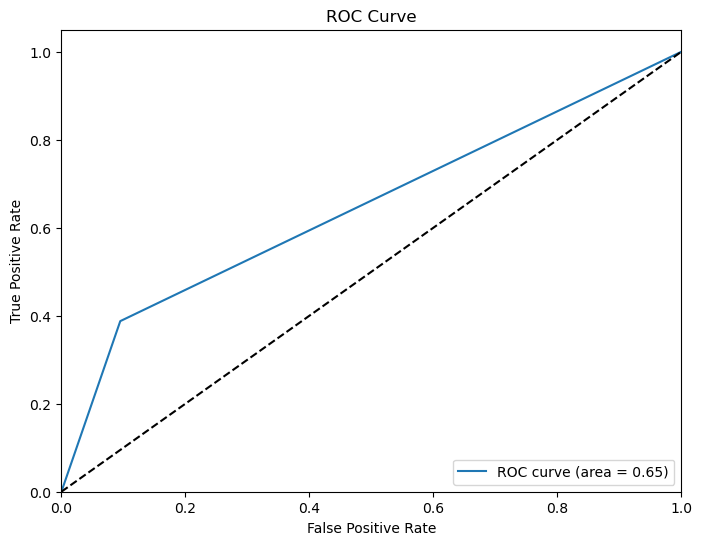

In [65]:
# ROC Curve Calculations
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Calculate fpr, tpr, thresholds (unused here)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

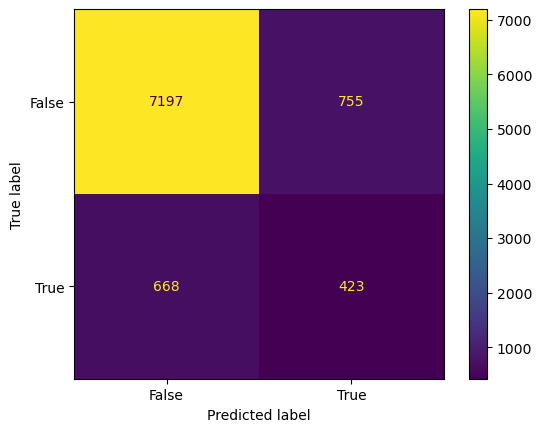

In [76]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred) 
  
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 
  
cm_display.plot() 
plt.show()